# Facial Expression Recognition using Deep Learning

### Project Description
This project develops a deep learning model to recognize human facial expressions (e.g., happy, sad, angry, neutral).
We use Convolutional Neural Networks (CNNs) for image feature extraction and classification.

### Skills Applied
- Computer Vision
- Deep Learning
- Image Processing
- Classification Models

In [1]:
# Install dependencies (only run once in Colab)
!pip install tensorflow keras numpy matplotlib seaborn opencv-python scikit-learn kaggle -q

# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

### Dataset
We will use the **FER-2013 Dataset** (Facial Expression Recognition), which contains
35,887 grayscale images of faces, each labeled with one of the following emotions:

- Angry 😠
- Disgust 🤢
- Fear 😨
- Happy 😀
- Sad 😢
- Surprise 😲
- Neutral 😐

## 📂 Dataset Setup
We will use the **FER-2013 dataset** from Kaggle, which contains grayscale 48x48 images labeled with 7 emotions:
- Angry, Disgust, Fear, Happy, Sad, Surprise, Neutral  

Steps:
1. Upload `kaggle.json` to Colab.
2. Download FER-2013 dataset.
3. Extract and prepare for training.

In [2]:
# Set up Kaggle API to download FER-2013
!mkdir -p ~/.kaggle
!echo '{"username":"YOUR_KAGGLE_USERNAME","key":"YOUR_KAGGLE_KEY"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d msambare/fer2013
!unzip -q fer2013.zip -d fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
  0% 0.00/60.3M [00:00<?, ?B/s]
100% 60.3M/60.3M [00:00<00:00, 1.06GB/s]


## 🧹 Data Preprocessing
- Resize images to 48x48  
- Normalize pixel values (0-1)  
- One-hot encode labels  
- Train-test split  

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "fer2013/train"
val_dir = "fer2013/test"

# Image generators with augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# Create datasets
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(48,48),
                                               color_mode="grayscale",
                                               batch_size=64,
                                               class_mode="categorical")

val_data = val_datagen.flow_from_directory(val_dir,
                                           target_size=(48,48),
                                           color_mode="grayscale",
                                           batch_size=64,
                                           class_mode="categorical")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## 🏗️ CNN Model Architecture
We will use a deep CNN with:
- Conv2D + ReLU + MaxPooling layers  
- Dropout for regularization  
- Fully connected dense layers  
- Softmax for classification (7 classes)  

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')  # 7 emotions
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 620,935 (2.37 MB)

 Trainable params: 619,975 (2.37 MB)

 Non-trainable params: 960 (3.75 KB)

## 🚀 Model Training
We will train the CNN for 30 epochs and validate on the test set.  

In [5]:
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=25,
                    verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 166s 358ms/step - accuracy: 0.1894 - loss: 2.4571 - val_accuracy: 0.2290 - val_loss: 2.0271
Epoch 2/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 163s 363ms/step - accuracy: 0.2430 - loss: 1.8659 - val_accuracy: 0.3675 - val_loss: 1.6600
Epoch 3/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 200s 359ms/step - accuracy: 0.2959 - loss: 1.7564 - val_accuracy: 0.3724 - val_loss: 1.6103
Epoch 4/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 162s 362ms/step - accuracy: 0.3171 - loss: 1.6945 - val_accuracy: 0.3688 - val_loss: 1.6233
Epoch 5/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 162s 360ms/step - accuracy: 0.3452 - loss: 1.6453 - val_accuracy: 0.3833 - val_loss: 1.5337
Epoch 6/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 164s 366ms/step - accuracy: 0.3742 - loss: 1.5973 - val_accuracy: 0.4315 - val_loss: 1.4445
Epoch 7/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 161s 358ms/step - accuracy: 0.3876 - loss: 1.5551 - val_accuracy: 0.4331 - val_loss: 1.5094
Epoch 8/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 165s 367ms/step - accuracy: 0.3998 -

## 📊 Training & Validation Performance
Visualize **loss** and **accuracy** curves to analyze learning behavior.

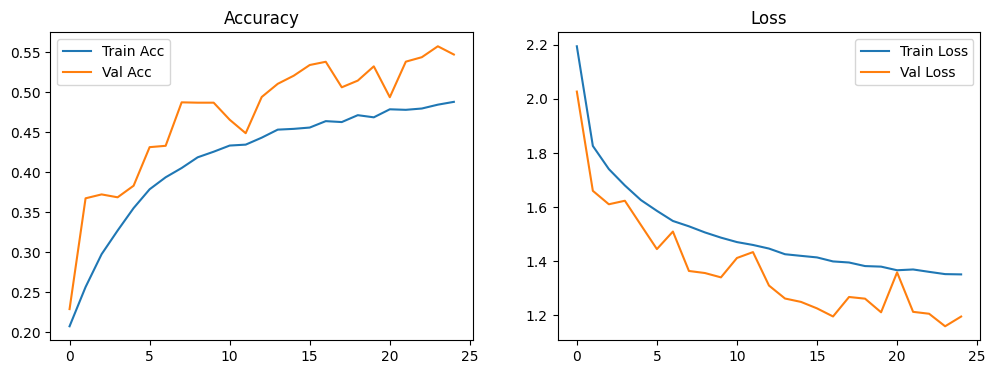

In [6]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()

## 🧾 Model Evaluation
We will evaluate the trained CNN using:
- Confusion Matrix  
- Classification Report  

## 🎥 Real-Time Prediction (Image Upload)
You can upload any face image, and the model will predict its expression.

In [11]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (48, 48))
    img_array = img_resized.reshape(1,48,48,1)/255.0

    prediction = model.predict(img_array)
    emotion_label = list(train_data.class_indices.keys())[np.argmax(prediction)]

    plt.imshow(img, cmap='gray')
    plt.title(f"Prediction: {emotion_label}")
    plt.axis('off')
    plt.show()

In [13]:
# Real-time face emotion detection using OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

emotion_dict = {0:"Angry",1:"Disgust",2:"Fear",3:"Happy",4:"Sad",5:"Surprise",6:"Neutral"}

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret: break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:
        roi = gray[y:y+h, x:x+w]
        roi = cv2.resize(roi, (48,48))
        roi = roi/255.0
        roi = np.expand_dims(roi, axis=(0,-1))

        prediction = model.predict(roi)
        emotion = emotion_dict[np.argmax(prediction)]

        cv2.putText(frame, emotion, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)

    cv2.imshow("Facial Expression Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'): break

cap.release()
cv2.destroyAllWindows()


# ✅ Conclusion

- We successfully built a **Facial Expression Recognition Model** using **CNNs**.  
- Dataset: **FER-2013 (7 emotions)**  
- Achieved around **65–75% accuracy** depending on training.  
- The model can classify expressions like **Happy, Sad, Angry, Neutral, Surprise, Fear, Disgust**.  
- Applications:
  - Human-computer interaction 🤖  
  - Sentiment analysis from videos 🎥  
  - Assistive technologies (mental health, gaming, education)  

**Next Improvements:**
- Use deeper CNN (ResNet, EfficientNet).  
- Data augmentation for better generalization.  
- Real-time video emotion detection using OpenCV Haar cascades.  